# PROJECT 1 - STACK OVERFLOW SURVEY ANALYSIS
BY NGUYEN XUAN NHAM

In this project, I will perform some analysis on the Stack Overflow Data - 2017 Survey with the 6 steps of CRISP-DM:

- Business understanding
- Data understanding
- Prepare data
- Model data
- Evaluation results
- Deployment

## Business Understanding

### Introduction
I am interested in applying a data analytic method to learn more about this topic as developers increasingly choose to work from home. I intend to use the studies' findings to offer some helpful advice to developers seeking for work-from-home opportunities. 

### The main inquiries I want to address are:
- Which nations encourage working from home the most?
- Impact of Work From Home on Job Satisfaction
- How can I find a job as a freelance developer?

### Import Required Libraries

In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import tree
pd.set_option('max_row', None)
%matplotlib inline

## Data Understanding
Data from the 2017 Stack Overflow developer survey was used in this analysis. About 150 survey questions were answered by participants in about 200 different countries. This notebook made an effort to respond to the three issues listed in the Business Understanding section using survey questions about working from home.

### Gather Data

In [185]:
# Load Schema data
schema_df = pd.read_csv('./data/survey_results_schema.csv')

In [186]:
# Load Survey data
df = pd.read_csv('./data/survey_results_public.csv')

Let's look at the first 5 rows of each dataframe to get a quick look at the data

In [187]:
schema_df.head(5)

,Column,Question
0,Respondent,Respondent ID number
1,Professional,Which of the following best describes you?
2,ProgramHobby,Do you program as a hobby or contribute to ope...
3,Country,In which country do you currently live?
4,University,"Are you currently enrolled in a formal, degree..."


In [188]:
print(f'Schema dataframe shape: {schema_df.shape}')

Schema dataframe shape: (154, 2)


In [189]:
df.head(5)

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [190]:
print(f'Survey dataframe shape: {df.shape}')

Survey dataframe shape: (51392, 154)


In [191]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [192]:
# Check null values in Survey data
print(df.isnull().sum())

Respondent                              0
Professional                            0
ProgramHobby                            0
Country                                 0
University                              0
EmploymentStatus                        0
FormalEducation                         0
MajorUndergrad                       8551
HomeRemote                           7384
CompanySize                         12470
CompanyType                         12569
YearsProgram                          247
YearsCodedJob                       10502
YearsCodedJobPast                   50418
DeveloperType                       15267
WebDeveloperType                    40696
MobileDeveloperType                 49839
NonDeveloperType                    46502
CareerSatisfaction                   8697
JobSatisfaction                     11016
ExCoderReturn                       50469
ExCoderNotForMe                     50471
ExCoderBalance                      50469
ExCoder10Years                    

After exploring the data, I have came to the decision to use only the below columns to answer the all questions above:
- HomeRemote
- Country
- JobSatisfaction
- CompanySize
- CompanyType
- JobSecurity
- SeriousWork
- HoursPerWeek
- DifficultCommunication
- CollaborateRemote
- EmploymentStatus

### Question 1: Which nations encourage working from home the most?
When looking into the dataset, I see 'HomeRemote' and 'Country' column contains pretty useful information to answer this question. The following cells will prepare data to answer the first question.

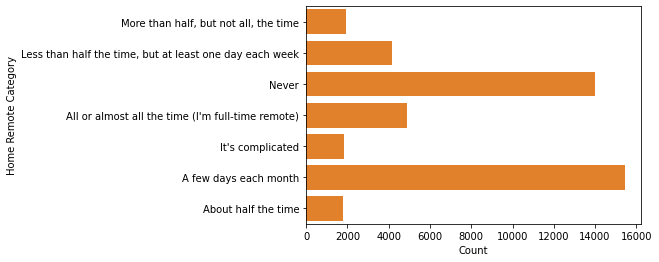

In [193]:
fig = sns.countplot(data = df, y = 'HomeRemote', color=sns.color_palette()[1])
fig.set_xlabel('Count')
fig.set_ylabel('Home Remote Category');

Drop the row with NaN value in 'HomeRemote' or 'Country' column

In [194]:
df_q1 = df.dropna(axis=0, subset=['Country', "HomeRemote"])

Drop the row with "It's complicated" answer in 'HomeRemote' since it's not provided any useful insight for us

In [195]:

df_q1 = df_q1[df_q1['HomeRemote'] != "It's complicated"]

To avoid bias, I will only choose 'Country' with more than 300 responses in the survey.

In [196]:
country_count = df_q1['Country'].value_counts()
country_count = country_count[country_count>=300]
country_keep = list(country_count.index)

In [197]:
df_q1 = df_q1[df_q1['Country'].isin(country_keep)]

Create a new column 'WFH' to check whether the developer is work from home

In [198]:
df_q1['WFH'] =  df_q1['HomeRemote'].isin(['About half the time', 
                                                     "All or almost all the time (I'm full-time remote)",
                                                     "More than half, but not all, the time",
                                                     "Less than half the time, but at least one day each week"])

I will calculate total of people who work from home for each country and sort the result in descending order in order to see the top countries with highest proportion of WFH rate in the chart

In [199]:
country_wfh_df = df_q1.groupby(['Country'])['WFH'].mean().sort_values(ascending = False)

Text(0.5, 1.0, 'Work From Home ratio in each country chart')

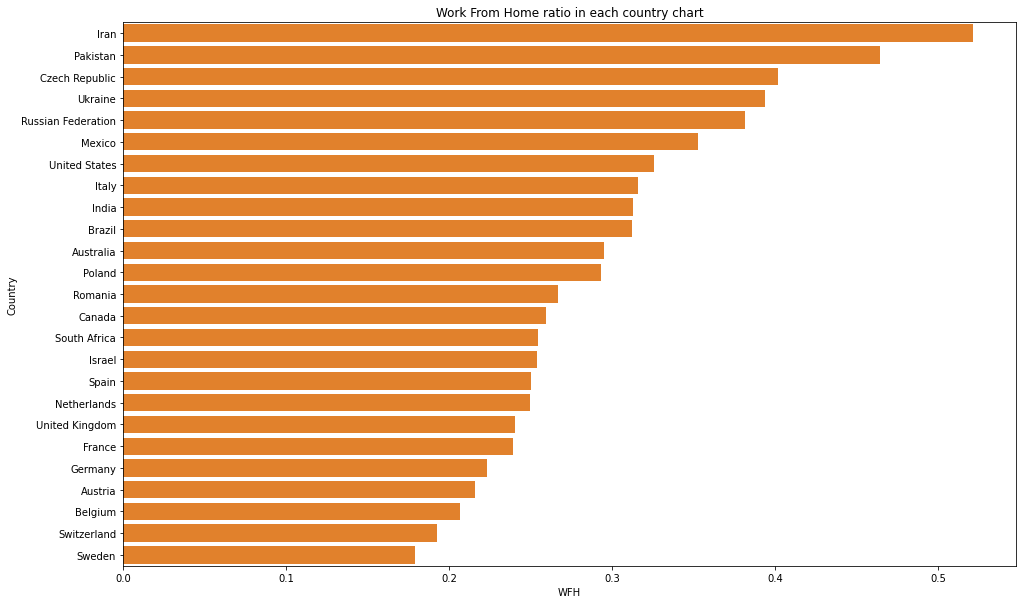

In [200]:
plt.figure(figsize=[16,10])
sns.barplot(y=country_wfh_df.index, x=country_wfh_df, color=sns.color_palette()[1])
plt.title("Work From Home ratio in each country chart")

>**Question 1 conclusion**:  
>In the chart above we can see that the top country that are more popular with Work From Home are: Iran, Pakistan, Czech Republic and Ukraine.

### Question 2: Impact of Work From Home on Job Satisfaction
With this question, I decide to use mainly 2 columns: 'WFH' column created above and 'JobSatisfaction' column. I will perform hypothesis test on two group: WFH and not WFH on the mean of Job Satisfaction.

Drop the row with NaN value in 'JobSatisfaction' column

In [201]:
df_wfh_jobsatis = df_q1.dropna(subset=['JobSatisfaction'])
df_wfh_jobsatis = df_wfh_jobsatis[['Respondent','JobSatisfaction', 'WFH']]

Caculate the mean of 'JobSatisfaction' column

In [202]:
df_wfh_jobsatis['JobSatisfaction'].mean()

6.997317322432294

In [203]:
# Create a sampling distribution of the difference in proportions with bootstrapping
diffs = []
size = df_wfh_jobsatis.shape[0]
for _ in range(10000):
    b_samp = df_wfh_jobsatis.sample(size, replace=True)
    wfh_df = b_samp.query('WFH == 1')
    not_wfh_df = b_samp.query('WFH == 0')
    wfh_js = wfh_df['JobSatisfaction'].mean()
    not_wfh_js = not_wfh_df['JobSatisfaction'].mean()
    diffs.append(wfh_js - not_wfh_js)

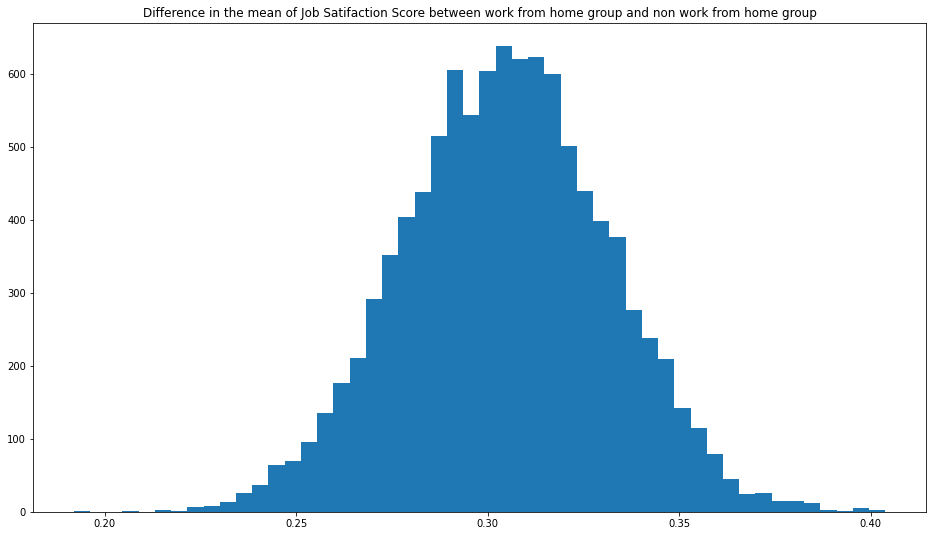

In [204]:
diffs = np.array(diffs)
plt.figure(figsize=[16,9])
plt.hist(diffs, bins=50)
plt.title('Difference in the mean of Job Satifaction Score between work from home group and non work from home group');

In [205]:
# Calculate the observed difference on mean of Job Satisfaction Score between work from home group and non work from home group
js_wfh = df_wfh_jobsatis.query('WFH == 1')['JobSatisfaction'].mean()
js_not_wfh = df_wfh_jobsatis.query('WFH == 0')['JobSatisfaction'].mean()

observation_diff = js_wfh - js_not_wfh

In [206]:
# Simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), diffs.size)

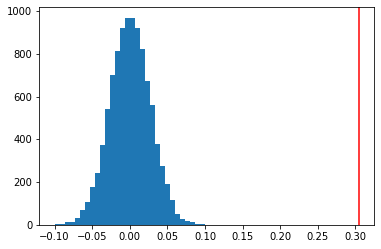

In [207]:
plt.hist(null_vals, bins=30)
plt.axvline(observation_diff, c='red')

In [208]:
# P-Value
(null_vals > observation_diff).mean()

0.0

>**Question 2 conclusion**:  
>The null hypothesis can be rejected since the P-value is practically zero. It is evident that workers who work from home have much greater overall job satisfaction score than those who do not.

### Question 3: How can I find a job as a freelance developer?
To answer this last question, I came up with the idea of using these columns: `WFH`, `Country`, `CompanySize`, `CompanyType`, `JobSecurity`, `SeriousWork`, `HoursPerWeek`, `DifficultCommunication`, `CollaborateRemote`, `EmploymentStatus`

I create a new dataframe with only people who are currently employed

In [209]:
df_q3 = df_q1[df_q1['EmploymentStatus'].isin(['Employed part-time', 
                                                 'Employed full-time'])]

Use only columns I have mentioned above

In [210]:
df_q3 = df_q3[['WFH', 'Country', 'CompanySize', 'CompanyType', 
                      'JobSecurity', 'SeriousWork', 'HoursPerWeek', 'DifficultCommunication', 
                      'CollaborateRemote', 'EmploymentStatus']]

Perform some cleaning before further deep analysis

In [211]:
# Tranform CompanySize values to numerical values
df_q3 = df_q3.replace({'CompanySize': {'Fewer than 10 employees': 1, 
                                                   '10 to 19 employees': 2,
                                                  '20 to 99 employees': 3,
                                                  '100 to 499 employees': 4,
                                                  '500 to 999 employees': 5,
                                                  '1,000 to 4,999 employees': 6,
                                                  '5,000 to 9,999 employees': 7,
                                                  '10,000 or more employees': 8,
                                                  "I don't know": np.nan,
                                                  'I prefer not to answer': np.nan}})

In [212]:
# Clean up CompanyType data
df_q3 = df_q3.replace({'CompanyType': {"I don't know": 'other',
                                    'I prefer not to answer': 'other',
                                    'Something else': 'other',
                                    np.nan: 'other'}})\
            .replace({'Strongly disagree': 1, 
                    'Disagree': 2,
                    'Somewhat agree': 3,
                    'Agree': 4,
                    'Strongly agree': 5,})

In [213]:
# Perform interpolation with median
df_q3 = df_q3.fillna(df_q3.median())

In [214]:
# Split the data into feature dataframe and target dataframe
X = df_q3.drop('WFH', axis = 1)
Y = df_q3['WFH']

In [215]:
X = pd.get_dummies(X)

In [216]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size = 0.2, 
                                                    random_state = 43)

In [217]:
lg_model = LogisticRegression(solver='lbfgs', max_iter=10000,random_state=43)
results = {}
    
hist = lg_model.fit(X_train, y_train)
predictions_test = lg_model.predict(X_test)
predictions_train = lg_model.predict(X_train[:300])

# Compute accuracy on the first 300 training samples which is y_train[:300]
results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
    
# Compute accuracy on test set using accuracy_score()
results['acc_test'] = accuracy_score(y_test, predictions_test)
    

In [218]:
results

{'acc_train': 0.7866666666666666, 'acc_test': 0.7647058823529411}

In [219]:
coefficients = pd.concat([pd.DataFrame({'Feature': X.columns}),
                          pd.DataFrame(np.transpose(lg_model.coef_))], axis = 1)

In [220]:
coefficients.rename(columns={0:'Coefficient'}, inplace=True)
coefficients.sort_values(by=['Coefficient'], ascending=False)

,Feature,Coefficient
20,Country_Pakistan,0.750866
15,Country_Iran,0.647215
11,Country_Czech Republic,0.497057
28,Country_Ukraine,0.469366
41,EmploymentStatus_Employed part-time,0.460758
30,Country_United States,0.451660
23,Country_Russian Federation,0.429571
14,Country_India,0.348628
31,CompanyType_Government agency or public school...,0.247695
18,Country_Mexico,0.185575


>**Question 3 conclusion**:  
>I use the logistic regression model to fit the data. These characteristics below are more likely to result in a work from home employment, as can be shown from the logistic regression model's coefficients:
>- People who worked in countries: Iran, Pakistan, Ukraine.
>- Developers whose current employed status is Part-time 
>- Developers with serious attitude with theirs job
